Rum Yue

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
raw = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [54]:
train = raw.copy()

In [61]:
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0,2014-12-02


In [56]:
# notice the feature of 'Timestamp'
# apply unit = 's' to transform current timestamp into correct date 
train['date'] = pd.to_datetime(train['Timestamp'], unit = 's').dt.date

In [59]:
train = train.dropna()

In [62]:
gp = train.groupby('date')

In [66]:
real_price = gp['Weighted_Price'].mean()

In [65]:
gp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01
7,1417412400,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01
51,1417415040,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000,2014-12-01
77,1417416600,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000,2014-12-01
1436,1417498140,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000,2014-12-02
1766,1417517940,377.75,378.00,377.75,378.00,4.000000,1511.937500,377.984375,2014-12-02
1771,1417518240,378.00,378.00,378.00,378.00,4.900000,1852.200000,378.000000,2014-12-02
1772,1417518300,378.00,378.00,378.00,378.00,5.200000,1965.600000,378.000000,2014-12-02
2230,1417545780,378.00,378.00,378.00,378.00,0.100000,37.800000,378.000000,2014-12-02
2882,1417584900,377.90,377.90,377.90,377.90,0.010000,3.779000,377.900000,2014-12-03


In [122]:
# we make predictions 30 days ahead
pred_days = 30
new_train = real_price[:len(real_price) - pred_days]
new_test = real_price[len(real_price) - pred_days:]

In [69]:
real_price.shape

(1465,)

In [83]:
# data preprocessing
traindata = new_train.values

In [84]:
traindata = traindata.reshape(-1, 1)

In [85]:
traindata.shape

(1435, 1)

In [88]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

In [89]:
traindata = msc.fit_transform(traindata)
X_train = traindata[0: len(traindata) - 1]
y_train = traindata[1: len(traindata)]

In [92]:
# let X set be 3D to prepare for rnn fit form
X_train = np.reshape(X_train, (len(X_train), 1, 1))
# X_train are required to be 3d when y_train needs to be 2d

Setting the RNN network

In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout, Flatten

Using TensorFlow backend.


In [97]:
md = Sequential()

In [98]:
md.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
md.add(Dense(units = 1))
md.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [99]:
md.fit(X_train, y_train, batch_size = 5, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1434/1434 [==============================] - 1s 673us/step - loss: 0.0395
Epoch 2/100
1434/1434 [==============================] - 0s 311us/step - loss: 0.0352
Epoch 3/100
1434/1434 [==============================] - 0s 309us/step - loss: 0.0313
Epoch 4/100
1434/1434 [==============================] - 0s 305us/step - loss: 0.0272
Epoch 5/100
1434/1434 [==============================] - 0s 305us/step - loss: 0.0229
Epoch 6/100
1434/1434 [==============================] - 0s 324us/step - loss: 0.0182
Epoch 7/100
1434/1434 [==============================] - 0s 339us/step - loss: 0.0136
Epoch 8/100
1434/1434 [==============================] - 0s 319us/step - loss: 0.0093
Epoch 9/100
1434/1434 [==============================] - 0s 313us/step - loss: 0.0057
Epoch 10/100
1434/1434 [==============================] - 0s 318us/step - loss: 0.0031
Epoch 11/100
1434/1434 [==============================] - 0s 312us/step - loss: 0.0015
Epoc

In [123]:
testdata = new_test.values

In [103]:
testdata = testdata.reshape(-1, 1)
testdata = msc.transform(testdata)
testdata = np.reshape(testdata, (len(testdata), 1, 1))

In [105]:
pred_BTC = md.predict(testdata)
pred_BTC = msc.inverse_transform(pred_BTC)

#### Visualize the prediction

In [125]:
new_test = new_test.reset_index()

In [126]:
x = new_test.index

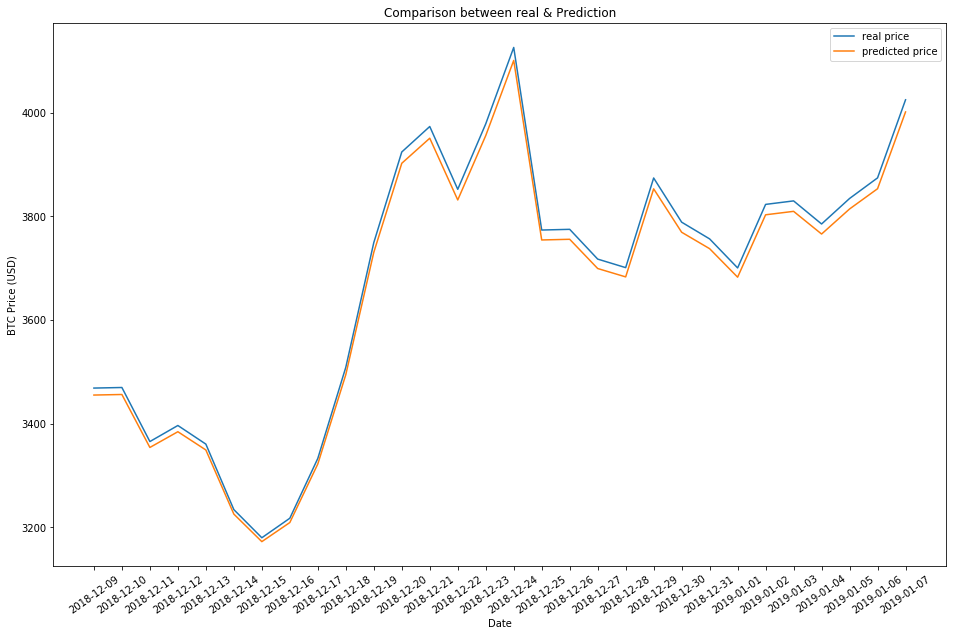

In [127]:
plt.figure(figsize = (16, 10))
plt.plot(testdata, label = 'real price')
plt.plot(pred_BTC, label = 'predicted price')
plt.title('Comparison between real & Prediction')
lb = new_test['date']
plt.xticks(x, lb, rotation = 35)
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')

plt.legend()
plt.show()

In [128]:
## cannot understand the usage of LSTM: even in test set we still need test data to predict 

### RNN v.s LSTM

In [2]:
raw = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [3]:
train = raw.copy()
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train['date'] = pd.to_datetime(train['Timestamp'], unit = 's').dt.date

In [5]:
train = train.dropna()

In [6]:
gp = train.groupby('date')

In [7]:
close = gp['Close'].mean()

In [8]:
close.head()

date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

RNN Model

In [10]:
pred = 50
cl_train = close[:len(close) - pred]
cl_test = close[len(close) - pred:]
# or use iloc[:len(close) - pred]

In [11]:
type(cl_train)

pandas.core.series.Series

In [15]:
new_train = cl_train.values
new_train = new_train.reshape(-1, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler as msc

In [17]:
sc = msc(feature_range = (0, 1))

In [19]:
traindata = sc.fit_transform(new_train)

In [20]:
X_train, y_train = [], []

In [49]:
# every 50 and 51st
for i in range(pred, len(traindata)):
    X_train.append(traindata[i - pred: i])
    y_train.append(traindata[i])

In [53]:
X_train, y_train = np.asarray(X_train), np.asarray(y_train)

In [58]:
X_train.ndim, y_train.ndim

(3, 2)

In [60]:
md = Sequential()

In [62]:
# 1st layer
md.add(SimpleRNN(128, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
md.add(Dropout(0.25))
# 2ne layer
md.add(SimpleRNN(256, activation = 'relu', return_sequences = True))
md.add(Dropout(0.25))
# 3rd layer
md.add(SimpleRNN(512, activation = 'relu', return_sequences = True))
md.add(Dropout(0.35))
# 4th layer
md.add(SimpleRNN(256, activation = 'relu', return_sequences = True))
md.add(Dropout(0.25))
# 5th layer
md.add(SimpleRNN(128, activation = 'relu', return_sequences = True))
md.add(Dropout(0.25))
# converter
md.add(Flatten())
#output
md.add(Dense(1))

md.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [63]:
md.fit(X_train, y_train, epochs = 100, batch_size = 64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2527/2527 [==============================] - 8s 3ms/step - loss: 0.0095
Epoch 2/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0026
Epoch 3/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 4/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0013
Epoch 5/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0012
Epoch 6/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0013
Epoch 7/100
2527/2527 [==============================] - 7s 3ms/step - loss: 9.8077e-04
Epoch 8/100
2527/2527 [==============================] - 7s 3ms/step - loss: 8.3855e-04
Epoch 9/100
2527/2527 [==============================] - 7s 3ms/step - loss: 8.0368e-04
Epoch 10/100
2527/2527 [==============================] - 7s 3ms/step - loss: 9.2861e-04
Epoch 11/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.0015
Epoch 12/1

2527/2527 [==============================] - 7s 3ms/step - loss: 5.1173e-04
Epoch 91/100
2527/2527 [==============================] - 7s 3ms/step - loss: 4.0753e-04
Epoch 92/100
2527/2527 [==============================] - 7s 3ms/step - loss: 3.6234e-04
Epoch 93/100
2527/2527 [==============================] - 7s 3ms/step - loss: 3.6352e-04
Epoch 94/100
2527/2527 [==============================] - 7s 3ms/step - loss: 2.6272e-04
Epoch 95/100
2527/2527 [==============================] - 7s 3ms/step - loss: 2.6276e-04
Epoch 96/100
2527/2527 [==============================] - 7s 3ms/step - loss: 2.9589e-04
Epoch 97/100
2527/2527 [==============================] - 7s 3ms/step - loss: 3.6651e-04
Epoch 98/100
2527/2527 [==============================] - 7s 3ms/step - loss: 4.4335e-04
Epoch 99/100
2527/2527 [==============================] - 7s 3ms/step - loss: 2.8420e-04
Epoch 100/100
2527/2527 [==============================] - 7s 3ms/step - loss: 2.6031e-04


In [67]:
inputs = close[len(close) - len(cl_test) - pred:]

In [70]:
inputs = inputs.values.reshape(-1, 1)
inputs = sc.transform(inputs)

In [75]:
X_test = []
for i in range(pred, inputs.shape[0]):
    X_test.append(inputs[i - pred: i])

In [76]:
X_test = np.asarray(X_test)

In [78]:
preds = md.predict(X_test)
preds = sc.inverse_transform(preds)

In [81]:
acprice = cl_test.reset_index()
ind = acprice.index
testdata = cl_test.values

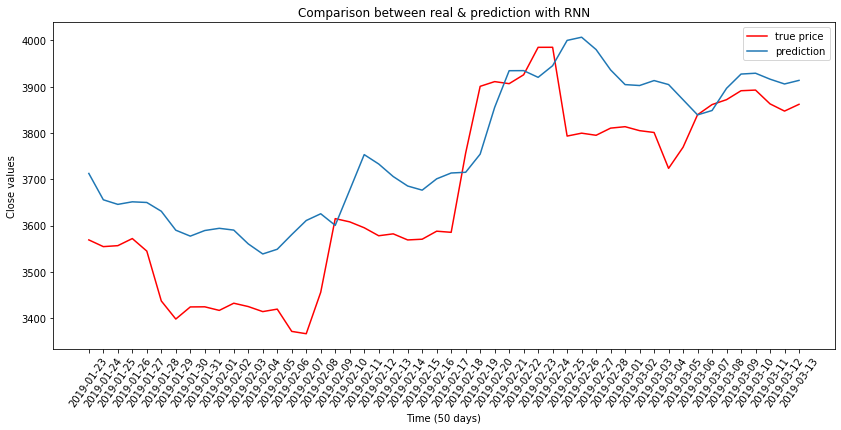

In [84]:
lb = acprice['date']
plt.figure(figsize = (14, 6))
plt.plot(testdata, color = 'r', label = 'true price')
plt.plot(preds, label = 'prediction')
plt.title('Comparison between real & prediction with RNN')
plt.xlabel('Time (50 days)')
plt.xticks(ind, lb, rotation = 55)
plt.ylabel('Close values')

plt.legend()
plt.show()

LSTM Model

In [85]:
from sklearn.metrics import mean_absolute_error

In [86]:
md = Sequential()

In [87]:
md.add(LSTM(units = 10, activation = 'relu', input_shape = (None, 1)))
md.add(Dense(units = 1))
md.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [89]:
md.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2527/2527 [==============================] - 3s 1ms/step - loss: 0.0105
Epoch 2/100
2527/2527 [==============================] - 3s 1ms/step - loss: 8.1476e-04
Epoch 3/100
2527/2527 [==============================] - 2s 989us/step - loss: 5.3239e-04
Epoch 4/100
2527/2527 [==============================] - 3s 1ms/step - loss: 4.4198e-04
Epoch 5/100
2527/2527 [==============================] - 3s 991us/step - loss: 3.7667e-04
Epoch 6/100
2527/2527 [==============================] - 2s 987us/step - loss: 3.4082e-04
Epoch 7/100
2527/2527 [==============================] - 3s 991us/step - loss: 3.1597e-04
Epoch 8/100
2527/2527 [==============================] - 2s 989us/step - loss: 3.0625e-04
Epoch 9/100
2527/2527 [==============================] - 2s 987us/step - loss: 2.9026e-04
Epoch 10/100
2527/2527 [==============================] - 2s 986us/step - loss: 2.8100e-04
Epoch 11/100
2527/2527 [==============================] - 3s 1ms/step - loss: 2.5996e-04
Epoch 12/100
2527/25

Epoch 93/100
2527/2527 [==============================] - 3s 993us/step - loss: 9.2946e-05
Epoch 94/100
2527/2527 [==============================] - 2s 980us/step - loss: 9.0492e-05
Epoch 95/100
2527/2527 [==============================] - 3s 1ms/step - loss: 9.4767e-05
Epoch 96/100
2527/2527 [==============================] - 2s 986us/step - loss: 9.0817e-05
Epoch 97/100
2527/2527 [==============================] - 3s 994us/step - loss: 9.2673e-05
Epoch 98/100
2527/2527 [==============================] - 3s 1ms/step - loss: 9.3764e-05
Epoch 99/100
2527/2527 [==============================] - 2s 980us/step - loss: 9.6348e-05
Epoch 100/100
2527/2527 [==============================] - 3s 1ms/step - loss: 9.0711e-05


In [90]:
inputs = close[len(close) - len(cl_test) - pred:]

In [91]:
inputs = inputs.values.reshape(-1, 1)
inputs = sc.transform(inputs)

In [92]:
X_test = []
for i in range(pred, inputs.shape[0]):
    X_test.append(inputs[i - pred: i])

X_test = np.asarray(X_test)

In [94]:
newpreds = md.predict(X_test)
newpreds = sc.inverse_transform(newpreds)

In [95]:
acprice = cl_test.reset_index()
ind = acprice.index
testdata = cl_test.values

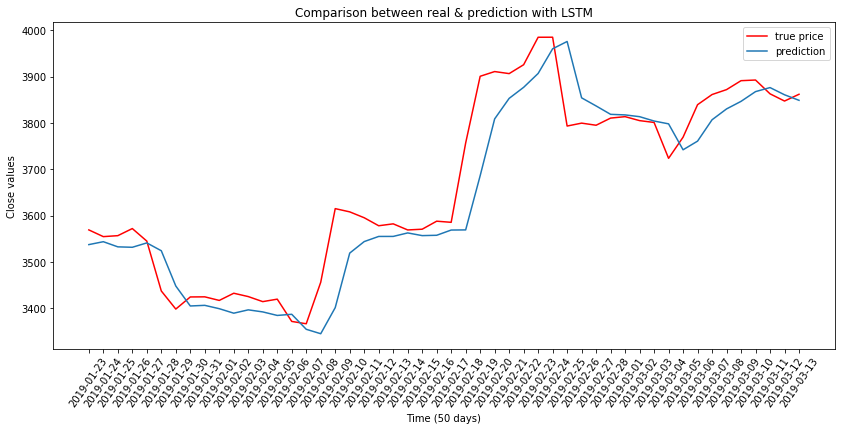

In [97]:
lb = acprice['date']
plt.figure(figsize = (14, 6))
plt.plot(testdata, color = 'r', label = 'true price')
plt.plot(newpreds, label = 'prediction')
plt.title('Comparison between real & prediction with LSTM')
plt.xlabel('Time (50 days)')
plt.xticks(ind, lb, rotation = 55)
plt.ylabel('Close values')

plt.legend()
plt.show()

LSTM does not consume unimportant info, as one special type of RNN